Develop a Class in Python called Dense_Layer (included in the submitted notebook).

In [146]:
# for Mathematical constants and functions
import math

class Dense_Layer:
    # function to setup/accept input and weight
    def input_weight(self, inputs, weights):
        # validation
        if inputs is None:
            print("Error: Does not have any input.")
            return False

        if weights is None:
            print("Error: Does not have any weights.")
            return False

        if len(inputs) != len(weights):
            print("Error: Input does not match the number of weight rows.")
            return False

        self.inputs = inputs
        self.weights = weights
        return True

    # function to perform weighted sum + bias
    def weighted_sum_bias(self, biases):
        # validation
        if biases is None:
            print("Error: Does not have any biases.")
            return False
        
        if len(self.weights[0]) != len(biases):
            print("Error: Biases does not match the number of weights.")
            return False
        
        self.biases = biases

        # get the number of output neurons
        num_of_neurons = len(self.weights[0])

        # empty list for output neurons
        result = [0] * num_of_neurons

        # function to solve the weighted sum and bias of each neuron
        for neuron in range(num_of_neurons):
            neuron_sum = 0

            for i in range(len(self.inputs)):
                neuron_sum += self.inputs[i] * self.weights[i][neuron]

            result[neuron] = neuron_sum + biases[neuron]

        return result
    
    #function o perform selected activation function
    def activation_function(self, biases, activation_used):
        x = self.weighted_sum_bias(biases)
        if x is None:
            print("Error: Does not have any weighted sum.")
            return False
        
        # empty list for result 
        result = []

        # Step function
        if activation_used == "Step":
            threshold = 0
            for value in x:
                if value > threshold:
                    result.append(1)
                else:
                    result.append(0)
            return result
            
        # Sigmoid function
        elif activation_used == "Sigmoid":
            for value in x:
                result.append(1 / (1 + math.exp(-value)))
            return result
            
        # Tanh function
        elif activation_used == "Tanh":
            for value in x:
                e_2x = math.exp(2 * value)
                result.append((e_2x - 1) / (e_2x + 1))
            return result
        
        # ReLU function
        elif activation_used == "ReLU":
            for value in x:
                if value > 0:
                    result.append(value)
                else:
                    result.append(0)
            return result
        
        # Softmax function
        elif activation_used == "Softmax":
            exp_values = [math.exp(value) for value in x]
            total = sum(exp_values)
            return [value / total for value in exp_values] 
        
        else: 
            print("Error: Unknown activation function is used.")
            return False
        
    # function to calculate loss
    def calculate_loss(self, predicted, target, loss_type):
        # validation
        if predicted is None or target is None:
            print("Error: Predicted and target cannot be empty")
            return False
        if len(predicted) != len(target):
            print("Error: Predicted and target must have the same length")
            return False
        
        total_loss = 0

        # Mean Square Error
        if loss_type == "MSE":
            for i in range(len(predicted)):
                error = predicted[i] - target[i]
                total_loss += error * error
            return total_loss / len(predicted)
        
        # Mean Absolute Error
        elif loss_type == "MAE":
            for i in range(len(predicted)):
                error = predicted[i] - target[i]
                total_loss += abs(error)
            return total_loss / len(predicted)
        
        # Binary Cross Entropy
        elif loss_type == "Binary_Cross_Entropy":
            for i in range(len(predicted)):
                total_loss += -(target[i] * math.log(predicted[i] + 1e-5) + (1 - target[i]) * math.log(1 - predicted[i] + 1e-5))
            return total_loss / len(predicted)
        
        # Cross_Entropy
        elif loss_type == "Cross_Entropy":
            for i in range(len(predicted)):
                total_loss += -target[i] * math.log(predicted[i] + 1e-5)
            return total_loss / len(predicted)

Given the following inputs from the Iris Dataset, using the sepal length, sepal width, petal length and petal width, determine what class (Iris-setosa, Iris-versicolor, and Iris-virginica) the following inputs are by calculating the output, given the neural network configurations:

(First Hidden Layer)
X = 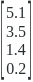
Target_output = 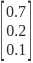
W1 = 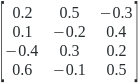
B1 = 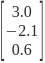
Activation Function = ReLU

(Second Hidden Layer)
W2 =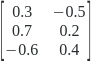
B2 = 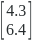
Activation Function = Sigmoid

(Last layer – Output Nodes, representing each of the Iris species)
W3 = 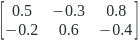
B3 = 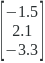
Activation Function = Softmax

In [147]:
def solve_iris_problem():  
    print("****** IRIS DATA SET ******")
    # Input data  
    X = [5.1, 3.5, 1.4, 0.2]
    target_output = [0.7, 0.2, 0.1]

    # first hidden layer 
    W1 = [[0.2, 0.5, -0.3],
          [0.1, -0.2, 0.4],
          [-0.4, 0.3, 0.2],
          [0.6, -0.1, 0.5]]
    
    B1 = [3.0, -2.1, 0.6]
    activation1 = "ReLU"

    # second hidden layer 
    W2 = [[0.3, -0.5],
          [0.7, 0.2],
          [-0.6, 0.4]]
    
    B2 = [4.3, 6.4]
    activation2 = "Sigmoid"

    # output layer
    W3 = [[0.5, -0.3, 0.8],
          [-0.2, 0.6, -0.4]]
    
    B3 = [-1.5, 2.1, -3.3]
    activation3 = "Softmax"

    loss_function = "Cross_Entropy"

    # create_layers
    layer1 = Dense_Layer()
    layer2 = Dense_Layer()
    layer3 = Dense_Layer()

    # forward pass
    # input to hidden layer 1
    print("\n*** HIDDEN LAYER 1 ***")
    layer1.input_weight(X, W1)
    z1 = layer1.weighted_sum_bias(B1)
    print("Weighted sum + bias = ", [round(val, 4) for val in z1])

    a1 = layer1.activation_function(B1, activation1)
    print("Activation function used: ", activation1, "\nAfter activation function = ", [round(val, 4) for val in a1])

    # hidden layer 1 to hidden layer 2
    print("\n*** HIDDEN LAYER 2 ***")
    layer2.input_weight(a1, W2)
    z2 = layer2.weighted_sum_bias(B2)
    print("Weighted sum + bias = ", [round(val, 4) for val in z2])

    a2 = layer2.activation_function(B2, activation2)
    print("Activation function used: ", activation2, "\nAfter activation function = ", [round(val, 4) for val in a2])

    # hidden layer 2 to ouput layer
    print("\n*** OUTPUT LAYER ***")
    layer3.input_weight(a2, W3)
    z3 = layer3.weighted_sum_bias(B3)
    print("Weighted sum + bias = ", [round(val, 4) for val in z3])

    a3 = layer3.activation_function(B3, activation3)
    print("Activation function used: ", activation3, "\nAfter activation function = ", [round(val, 4) for val in a3])

    # calculate loss
    print("\n*** LOSS ***")
    loss = layer3.calculate_loss(a3, target_output, loss_function)
    print("Loss based on", loss_function, ":", loss)

    # predicted class 
    print("\n*** PREDICTION ***")
    class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
    predicted_class_index = a3.index(max(a3))
    predicted_class = class_names[predicted_class_index]
    predicted_confidence = max(a3)

    print("Output probability (0 = Iris-setosa | 1 = Iris-versicolor | 2 = Iris-virginica): ", [round(val, 4) for val in a3])
    print("Predicted Class: ", predicted_class)
    print("Probability: ", round(predicted_confidence, 4) * 100, "%")
    print("Target Output: ", target_output)

    return a3, loss, predicted_class
    
final_output, loss_value, predicted_class = solve_iris_problem()

****** IRIS DATA SET ******

*** HIDDEN LAYER 1 ***
Weighted sum + bias =  [3.93, 0.15, 0.85]
Activation function used:  ReLU 
After activation function =  [3.93, 0.15, 0.85]

*** HIDDEN LAYER 2 ***
Weighted sum + bias =  [5.074, 4.805]
Activation function used:  Sigmoid 
After activation function =  [0.9938, 0.9919]

*** OUTPUT LAYER ***
Weighted sum + bias =  [-1.2015, 2.397, -2.9017]
Activation function used:  Softmax 
After activation function =  [0.0265, 0.9687, 0.0048]

*** LOSS ***
Loss based on Cross_Entropy : 1.0267279905604874

*** PREDICTION ***
Output probability (0 = Iris-setosa | 1 = Iris-versicolor | 2 = Iris-virginica):  [0.0265, 0.9687, 0.0048]
Predicted Class:  Iris-versicolor
Probability:  96.87 %
Target Output:  [0.7, 0.2, 0.1]


Given the following inputs from the Breast Cancer Dataset, using three features: Mean Radius, Mean Texture, and Mean Smoothness, determine whether the tumor is Benign (0) or Malignant (1) by calculating the network outputs step by step, given the following neural network configuration:

(First Hidden Layer)
X = 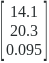
Target_output = [1] 
W1 = 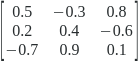
B1 = 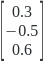
Activation Function = ReLU

(Second Hidden Layer)
W2 = 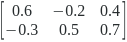
B2 = 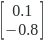
Activation Function = Sigmoid

(Last layer – Output Nodes)
W3 = 
B3 = 
Activation Function = Sigmoid

In [148]:
def solve_iris_problem():  
    print("****** BREAST CANCER DATASET ******")
    # Input data  
    X = [14.1, 20.3, 0.095]
    target_output = [1]

    # first hidden layer 
    W1 = [[0.5, -0.3, 0.8],
          [0.2, 0.4, -0.6],
          [-0.7, 0.9, 0.1]]
    
    B1 = [0.3, -0.5, 0.6]
    activation1 = "ReLU"

    # second hidden layer 
    W2 = [[0.6, -0.3],
          [-0.2, 0.5],
          [0.4, 0.7]]
    
    B2 = [0.1, -0.8]
    activation2 = "Sigmoid"

    # output layer
    W3 = [[0.7],
          [-0.5]]
    
    B3 = [0.2]
    activation3 = "Sigmoid"

    loss_function = "Binary_Cross_Entropy"

    # create_layers
    layer1 = Dense_Layer()
    layer2 = Dense_Layer()
    layer3 = Dense_Layer()

    # forward pass
    # input to hidden layer 1
    print("\n*** HIDDEN LAYER 1 ***")
    layer1.input_weight(X, W1)
    z1 = layer1.weighted_sum_bias(B1)
    print("Weighted sum + bias = ", [round(val, 4) for val in z1])

    a1 = layer1.activation_function(B1, activation1)
    print("Activation function used: ", activation1, "\nAfter activation function = ", [round(val, 4) for val in a1])

    # hidden layer 1 to hidden layer 2
    print("\n*** HIDDEN LAYER 2 ***")
    layer2.input_weight(a1, W2)
    z2 = layer2.weighted_sum_bias(B2)
    print("Weighted sum + bias = ", [round(val, 4) for val in z2])

    a2 = layer2.activation_function(B2, activation2)
    print("Activation function used: ", activation2, "\nAfter activation function = ", [round(val, 4) for val in a2])

    # hidden layer 2 to ouput layer
    print("\n*** OUTPUT LAYER ***")
    layer3.input_weight(a2, W3)
    z3 = layer3.weighted_sum_bias(B3)
    print("Weighted sum + bias = ", [round(val, 4) for val in z3])

    a3 = layer3.activation_function(B3, activation3)
    print("Activation function used: ", activation3, "\nAfter activation function = ", [round(val, 4) for val in a3])

    # calculate loss
    print("\n*** LOSS ***")
    loss = layer3.calculate_loss(a3, target_output, loss_function)
    print("Loss based on", loss_function, ":", loss)

    # predicted class 
    print("\n*** PREDICTION ***")
    predicted_class = "Malignant (1)" if a3[0] > 0.5 else "Benign (0)"
    predicted_confidence = max(a3)

    print("Output probability: ", [round(val, 4) for val in a3])
    print("Predicted Class: ", predicted_class)
    print("Probability: ", round(predicted_confidence, 4) * 100, "%")
    print("Target Output: ", target_output)

    return a3, loss, predicted_class
    
breat_output, breast_loss, breast_prediction = solve_iris_problem()

****** BREAST CANCER DATASET ******

*** HIDDEN LAYER 1 ***
Weighted sum + bias =  [11.3435, 3.4755, -0.2905]
Activation function used:  ReLU 
After activation function =  [11.3435, 3.4755, 0]

*** HIDDEN LAYER 2 ***
Weighted sum + bias =  [6.211, -2.4653]
Activation function used:  Sigmoid 
After activation function =  [0.998, 0.0783]

*** OUTPUT LAYER ***
Weighted sum + bias =  [0.8594]
Activation function used:  Sigmoid 
After activation function =  [0.7025]

*** LOSS ***
Loss based on Binary_Cross_Entropy : 0.35303521235703655

*** PREDICTION ***
Output probability:  [0.7025]
Predicted Class:  Malignant (1)
Probability:  70.25 %
Target Output:  [1]
